In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report

import firebase_admin
from firebase_admin import credentials, firestore
from torchvision import datasets

#### Firebase Setup ##################################################################################################################
db_table = 'kosmos2_miniImageNet'

if not firebase_admin._apps:
    cred = credentials.Certificate('serviceAccount.json')
    firebase_admin.initialize_app(cred)
db = firestore.client()

print("Firebase ok")

/home/andrea/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/andrea/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:644: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Firebase ok


In [2]:
docs = db.collection(db_table).stream()

true_labels = []
predicted_labels = []

for doc in docs:
    if doc.id == "last_index":
        continue
    doc_ref = db.collection(db_table).document(doc.id)
    doc_dict = doc.to_dict()
    true_labels.append(doc_dict['True Label'])
    predicted_labels.append(doc_dict['Predicted Label'])

labels = np.unique(np.concatenate((predicted_labels, true_labels)))
labels

array(['African_hunting_dog', 'Arctic_fox', 'French_bulldog',
       'Gordon_setter', 'Ibizan_hound', 'Newfoundland', 'Saluki',
       'Tibetan_mastiff', 'Walker_hound', 'aircraft_carrier', 'ant',
       'ashcan', 'barrel', 'beer_bottle', 'black-footed_ferret', 'bolete',
       'bookshop', 'boxer', 'cannon', 'carousel', 'carton', 'catamaran',
       'chime', 'cliff', 'clog', 'cocktail_shaker', 'combination_lock',
       'consomme', 'coral_reef', 'crate', 'cuirass', 'dalmatian',
       'dishrag', 'dome', 'dugong', 'ear', 'electric_guitar', 'file',
       'fire_screen', 'frying_pan', 'garbage_truck', 'golden_retriever',
       'goose', 'green_mamba', 'hair_slide', 'harvestman', 'holster',
       'horizontal_bar', 'hotdog', 'hourglass', 'house_finch', 'iPod',
       'jellyfish', 'king_crab', 'komondor', 'ladybug', 'lion',
       'lipstick', 'malamute', 'meerkat', 'miniature_poodle', 'miniskirt',
       'missile', 'mixing_bowl', 'nematode', 'oboe', 'orange', 'organ',
       'parallel_bars'

In [3]:
for el in predicted_labels:
    if (el not in labels):
        print(f"ERROR: {el}")

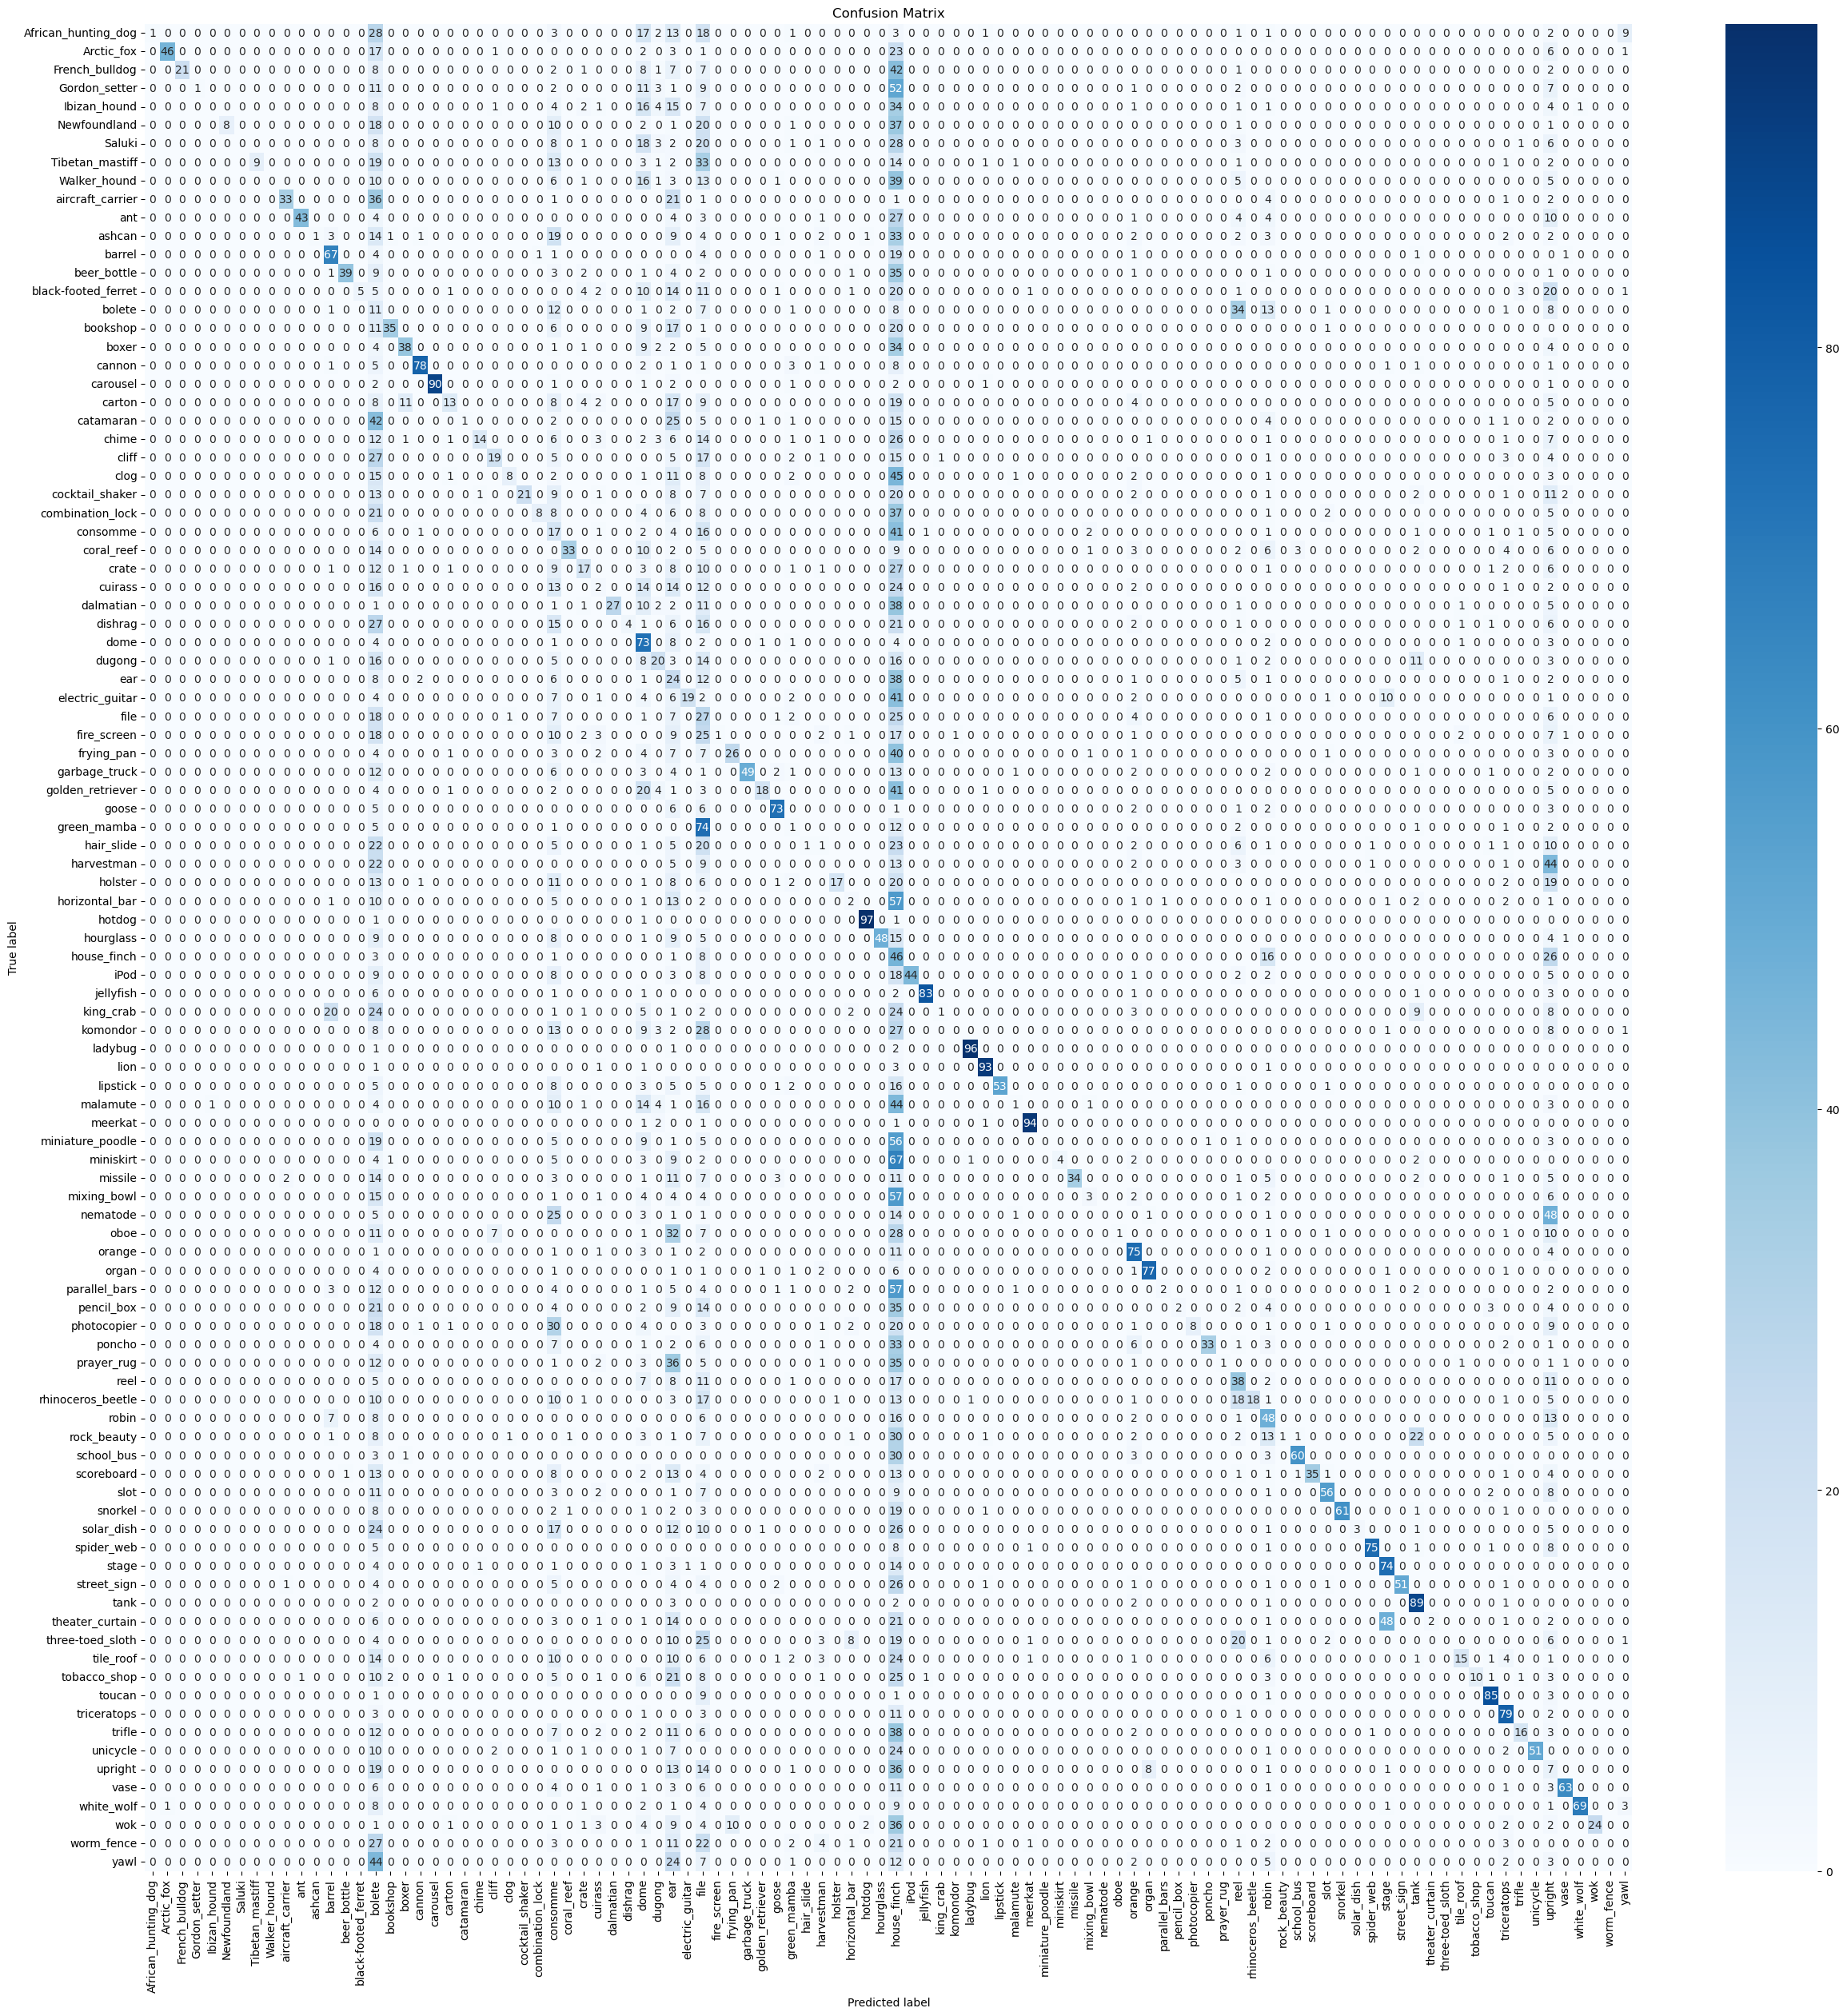

In [4]:
class_to_index = {class_name: index for index, class_name in enumerate(labels)}
index_pred_labels = np.array([class_to_index[label] for label in predicted_labels])
index_true_labels = np.array([class_to_index[label] for label in true_labels])

confusion_mat = confusion_matrix(index_true_labels, index_pred_labels)

plt.figure(figsize=(30, 30))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('kosmos2_100w.png')
plt.show()

In [5]:
classification_report = classification_report(true_labels, predicted_labels, target_names=labels)

with open("kosmos2_100w.txt", "w") as f:
    print(classification_report, file=f)

print(classification_report)

                     precision    recall  f1-score   support

African_hunting_dog       1.00      0.01      0.02       100
         Arctic_fox       0.98      0.46      0.63       100
     French_bulldog       1.00      0.21      0.35       100
      Gordon_setter       1.00      0.01      0.02       100
       Ibizan_hound       0.00      0.00      0.00       100
       Newfoundland       1.00      0.08      0.15        99
             Saluki       0.00      0.00      0.00       100
    Tibetan_mastiff       1.00      0.09      0.17       100
       Walker_hound       0.00      0.00      0.00       100
   aircraft_carrier       0.92      0.33      0.49       100
                ant       0.98      0.43      0.59       101
             ashcan       1.00      0.01      0.02       100
             barrel       0.63      0.67      0.65       100
        beer_bottle       0.97      0.39      0.56       100
black-footed_ferret       1.00      0.05      0.10       100
             bolete    

/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
